In [1]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
import os
import csv
import sys
#sys.path.append('/mnt/c/Users/gweld/sidewalk/sidewalk_ml/')
sys.path.append('~/project_sidewalk_ml/')
from GSVutils import sliding_window

ImportError: No module named GSVutils

In [2]:
clip_vals = (None, .5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6)

batch_p_r(dir_containing_preds, scaling, clust_r, cor_r, clip_val=None):

In [2]:
results = []
for cv in clip_vals:
    results.append(sliding_window.batch_p_r(sliding_window.gt_dir, 150, 1.0, clip_val = cv, preds_filename=sliding_window.pred_file_name))

Processing predictions for -YP7VVRO4_pQYPY6RtYQcg
	 Loaded 2304 predictions and 16 true labels
	 Clipped/ignored 2304 pts down to 696
	 Clustered down to 51
	Comparing to 16 ground truth points.
Returning 12 correct and 39 incorrect.
Returning 12 predicted and 4 missed.
Processing predictions for 0KjoViF5xreeiPSb1RuThQ
	 Loaded 2304 predictions and 4 true labels
	 Clipped/ignored 2304 pts down to 503
	 Clustered down to 72
	Comparing to 4 ground truth points.
Returning 4 correct and 68 incorrect.
Returning 4 predicted and 0 missed.
Processing predictions for 1-2MNgRG-iN6DwktcIRE_g
	 Loaded 2304 predictions and 6 true labels
	 Clipped/ignored 2304 pts down to 406
	 Clustered down to 42
	Comparing to 6 ground truth points.
Returning 6 correct and 36 incorrect.
Returning 6 predicted and 0 missed.
Processing predictions for 1a1UlhadSS_3dNtc5oI10Q
	 Loaded 2304 predictions and 7 true labels
	 Clipped/ignored 2304 pts down to 797
	 Clustered down to 75
	Comparing to 7 ground truth points.
Re

In [18]:
results = [{} for _ in range(len(clip_vals))]
with open('new_results.csv') as f:
    reader = csv.reader(f)
    reader.next()
    reader.next()
    for row in reader:
        label, rest = row[0], row[1:]
        
        for i in range(len(clip_vals)):
            p,r = float(rest[2*i]), float(rest[2*i+1])
            results[i][label] = (p,r)
    

In [19]:
for cv, r in zip(clip_vals, results):
    print cv
    print r['Overall']

None
(10.484365419987737, 82.92919495635306)
0.5
(10.70440251572327, 82.54122211445198)
1
(11.655172413793103, 81.95926285160039)
1.5
(13.84511099813591, 79.24345295829292)
2
(17.732007575757574, 72.6479146459748)
2.5
(22.514005602240896, 62.3666343355965)
3
(30.180878552971574, 56.64403491755577)
3.5
(38.58327053504145, 49.66052376333657)
4
(46.895787139689574, 41.028128031037824)
4.5
(53.28000000000001, 32.29873908826382)
5
(56.04938271604938, 22.017458777885548)
5.5
(57.08502024291497, 13.676042677012608)
6
(54.761904761904766, 6.692531522793405)


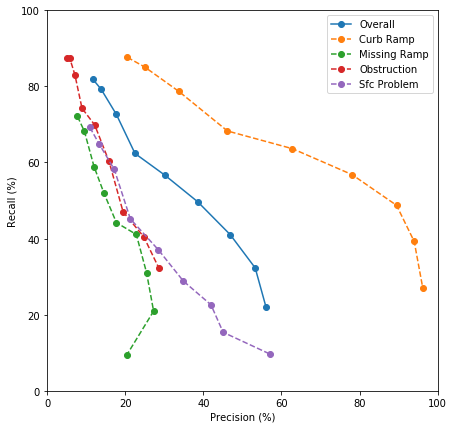

In [24]:
plt.figure(figsize=(7,7))
for label in ('Overall', 'Curb Ramp', 'Missing Ramp', 'Obstruction', 'Sfc Problem'):
    #print label
    pr = [x[label] for x in results][2:-2]
    p,r = zip(*pr)
    #print pr
    #print p
    #print r
    marker = 'o'
    line   = 'dashed' if label != 'Overall' else 'solid'
    plt.plot(p, r, linestyle=line, marker=marker, label=label)
plt.xlabel('Precision (%)')
plt.ylabel('Recall (%)')
plt.xlim(0,100)
plt.ylim(0,100)
#plt.title("Precision-Recall Curves by Feature Type")
plt.legend()
plt.show()

In [13]:
results = 'prelim_results.csv'

p_by_label = {}
r_by_label = {}

with open(results) as f:
    reader = csv.reader(f)
    for row in reader:
        label=row[0]
        scores=row[1:]
        precision = [float(x[1]) for x in enumerate(scores) if x[0] % 2 == 0]
        recall    = [float(x[1]) for x in enumerate(scores) if x[0] % 2 == 1]
        print label
        print precision
        print recall
        p_by_label[label] = precision
        r_by_label[label] = recall

Curb Cut
[18.47, 20.43, 33.74, 62.83, 89.8, 96.18]
[89.82, 87.1, 78.67, 63.62, 48.92, 27.06]
Obstruction
[4.71, 5.04, 7.18, 12.07, 19.45, 28.57]
[85.29, 87.5, 83.82, 69.12, 47.06, 32.35]
Missing Cut
[6.69, 7.79, 12.03, 17.76, 25.48, 20.34]
[76.74, 72.09, 58.91, 44.19, 31.01, 9.3]
Sfc Problem
[9.73, 10.95, 17.21, 28.52, 41.96, 57.14]
[75.48, 69.23, 58.17, 37.02, 22.6, 9.62]
Overall
[10.45, 11.61, 17.76, 30.13, 47.01, 56.05]
[82.64, 81.67, 72.24, 56.55, 41.23, 22.02]


In [7]:
with open("new_results.csv", 'w') as f:
    writer = csv.writer(f)
    row = ['Label']
    for cv in clip_vals:
        row.append(cv if cv is not None else "None")
        row.append(cv if cv is not None else "None")
    writer.writerow(row)
    header = ['Label'] + len(clip_vals) * ['precision', 'recall']
    writer.writerow(header)
    for label in results[0].keys():
        row = [label]
        for r in results:
            p, r = r[label]
            row += [p, r]
        writer.writerow(row)